<a href="https://colab.research.google.com/github/s10758018/Data/blob/master/%E3%80%8C1217%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
system("ls", TRUE)

[1] "sample_data"

In [ ]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(SportsAnalytics)

In [ ]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")

In [ ]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



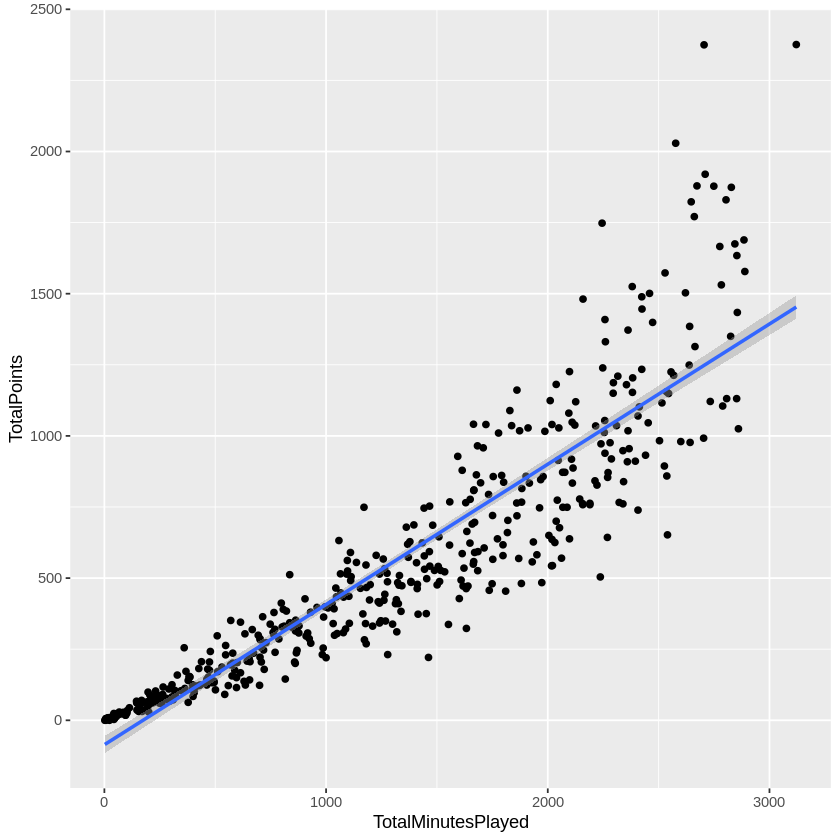

In [ ]:
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [ ]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -85.907               0.493  


In [ ]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -1.80e+01            -2.35e-04             1.26e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    9.9e+07 
Residual Deviance: 2160000 	AIC: 5370

In [ ]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           22.85222             -0.00654              1.27572  
         PositionPF           PositionPG           PositionSF  
          -39.41633            -65.03465            -38.52230  
         PositionSG  
          -52.17514  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    9.9e+07 
Residual Deviance: 2e+06 	AIC: 5320

In [ ]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [ ]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.6,3
2,1,660,3.7,3
3,1,800,4.0,1
4,1,640,3.2,4
5,0,520,2.9,4
6,1,760,3.0,2


In [ ]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.9900,1.1400,-3.5,0.00047
gre,0.0023,0.0011,2.1,0.03847
gpa,0.8040,0.3318,2.4,0.01539
rank2,-0.6754,0.3165,-2.1,0.03283
rank3,-1.3402,0.3453,-3.9,0.00010
rank4,-1.5515,0.4178,-3.7,0.00020


In [ ]:
OneVar<-glm(TotalPoints~TotalMinutesPlayed,data =NBA1516)
TwoVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,

data =NBA1516)

ThreeVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,

data =NBA1516)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6339 5367 5322

In [ ]:
sum2<-summary(TwoVar)
sum2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.8e+01,5.6598,-3.178,1.6e-03
TotalMinutesPlayed,-2.3e-04,0.0095,-0.025,9.8e-01
FieldGoalsAttempted,1.3e+00,0.0222,56.467,2.5e-212


In [ ]:
sum3<-summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.8522,9.0147,2.53,1.2e-02
TotalMinutesPlayed,-0.0065,0.0092,-0.71,4.8e-01
FieldGoalsAttempted,1.2757,0.0216,58.93,1.1e-218
PositionPF,-39.4163,9.9365,-3.97,8.4e-05
PositionPG,-65.0346,10.2693,-6.33,5.6e-10
PositionSF,-38.5223,10.4882,-3.67,2.7e-04
PositionSG,-52.1751,9.9853,-5.23,2.6e-07


In [ ]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 360 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 240 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=1.7e+02 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 1.7e+02 247 160 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 60 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=60 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 82 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
           60)

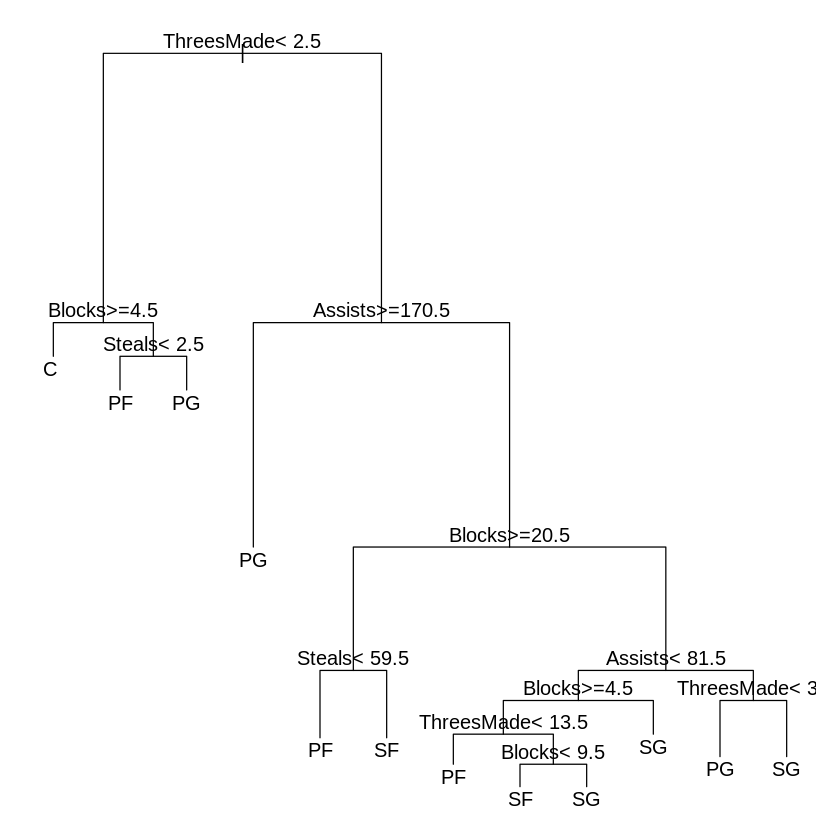

In [ ]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



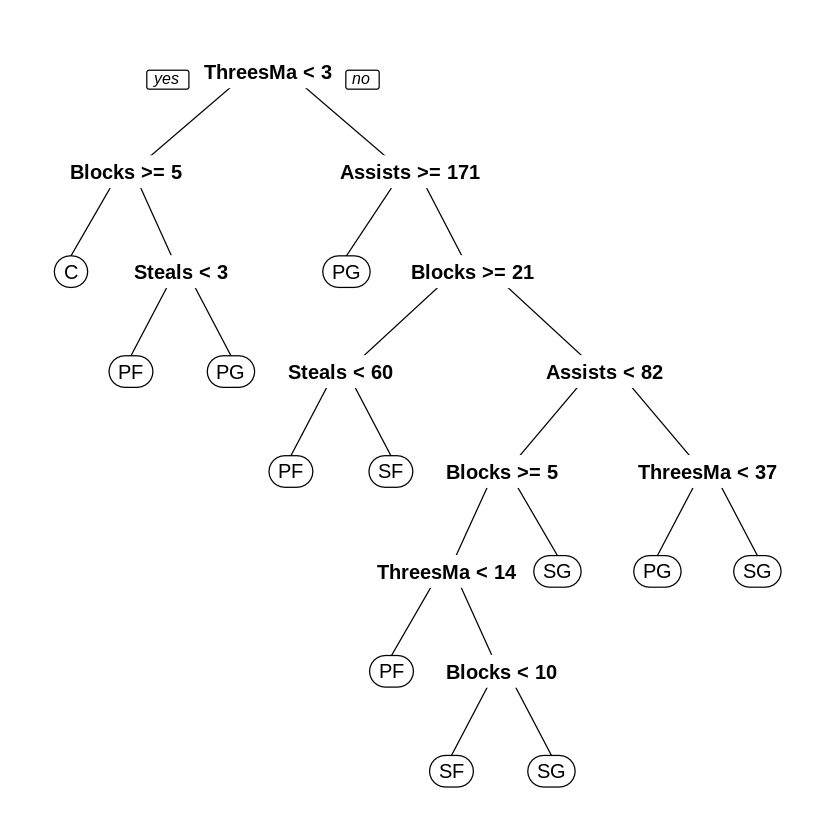

In [ ]:
install.packages("rpart.plot") #第一次使用前須先安裝

library(rpart.plot)
prp(DT)

In [ ]:
mtcars.mxs<-as.matrix(mtcars)
d<-dist(mtcars.mxs) #預設為euclidean
head(d)

[1]   0.62  54.91  98.11 210.34  65.47 241.41

In [ ]:
d<-dist(mtcars.mxs, method="manhattan") #計算manhattan距離
head(d)

[1]   0.81  79.30 108.80 275.43  84.64 347.96

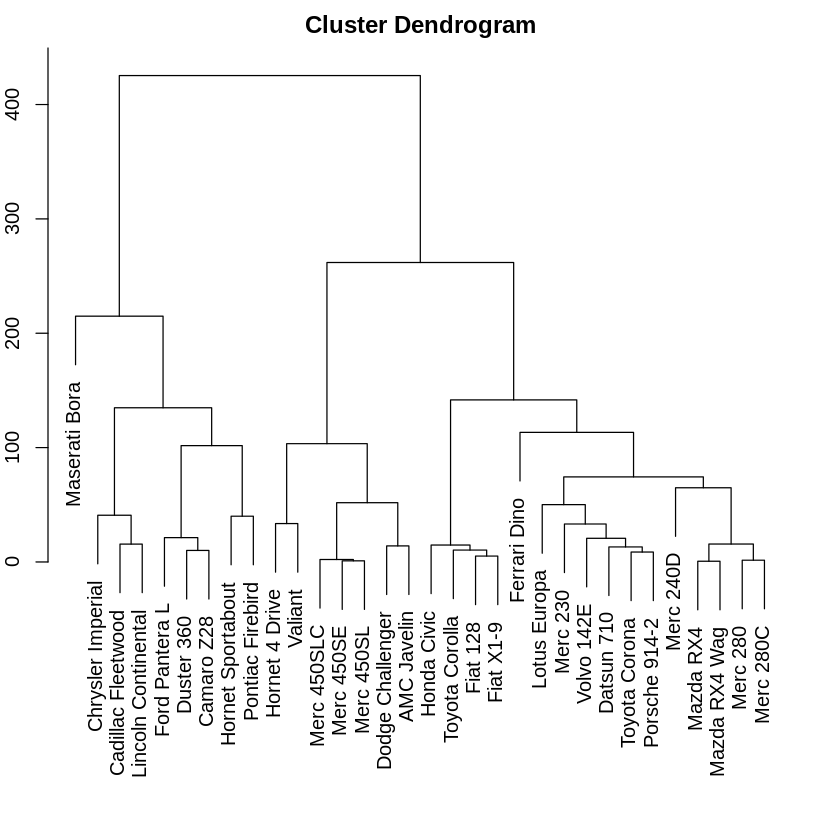

In [ ]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs)) #可用method參數設定聚合方法,預設為complete
plot(hc)

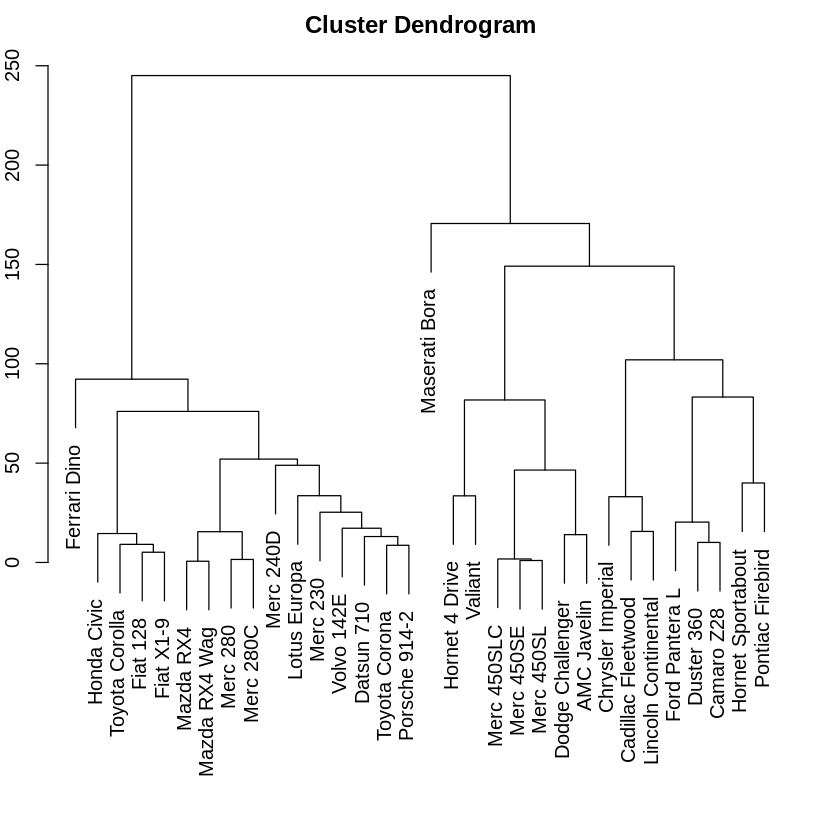

In [ ]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs),method="average") #聚合方法為計算平均距離
plot(hc)

In [ ]:
clusterCut <- cutree(hc, k=5) #分5群
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710           Merc 240D 
                  1                   1                   1                   1 
           Merc 230            Merc 280           Merc 280C            Fiat 128 
                  1                   1                   1                   1 
        Honda Civic      Toyota Corolla       Toyota Corona           Fiat X1-9 
                  1                   1                   1                   1 
      Porsche 914-2        Lotus Europa        Ferrari Dino          Volvo 142E 
                  1                   1                   1                   1 
     Hornet 4 Drive             Valiant          Merc 450SE          Merc 450SL 
                  2                   2                   2                   2 
        Merc 450SLC    Dodge Challenger         AMC Javelin   Hornet Sportabout 
                  2                   2                   2                   3 
         Duster 360          Camaro Z28    Pontiac Firebird      Ford Pantera L 
                  3                   3                   3                   3 
 Cadillac Fleetwood Lincoln Continental   Chrysler Imperial       Maserati Bora 
                  4                   4                   4                   5

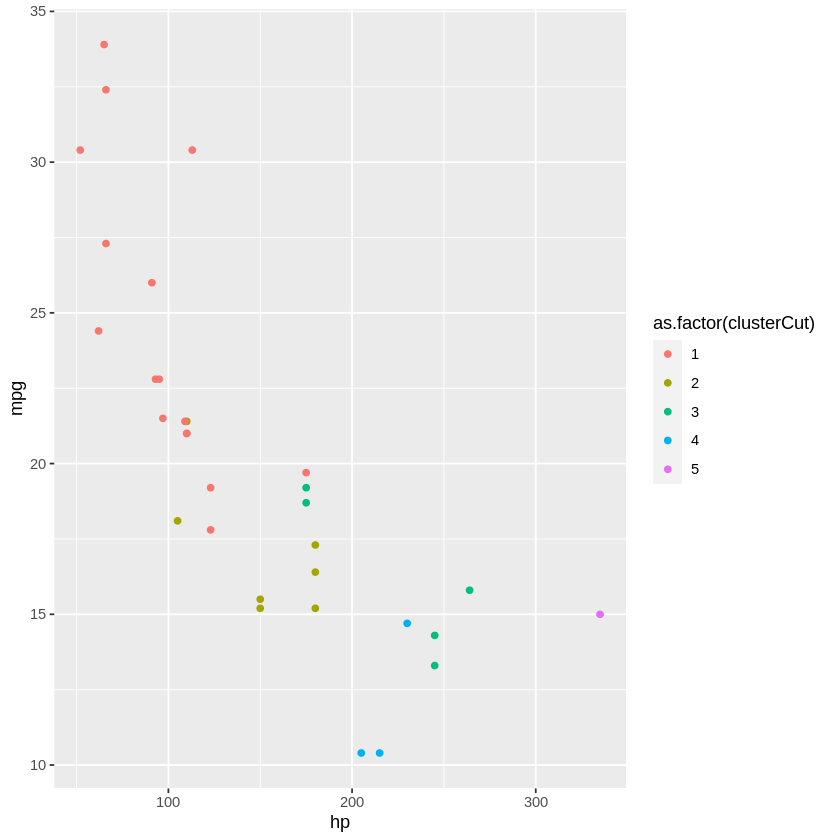

In [ ]:
ggplot()+geom_point(data=mtcars,

aes(x=hp,y=mpg,color=as.factor(clusterCut)))

In [ ]:
clusterCut <- cutree(hc,h =4) #切在高度=4的地方(距離=4)
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   3 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  4                   5                   6                   7 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  8                   9                   9                  10 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                 10                  10                  11                  12 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                 13                  14                  15                  16 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                 17                  18                  19                  20 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                 21                  22                  23                  24 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                 25                  26                  27                  28

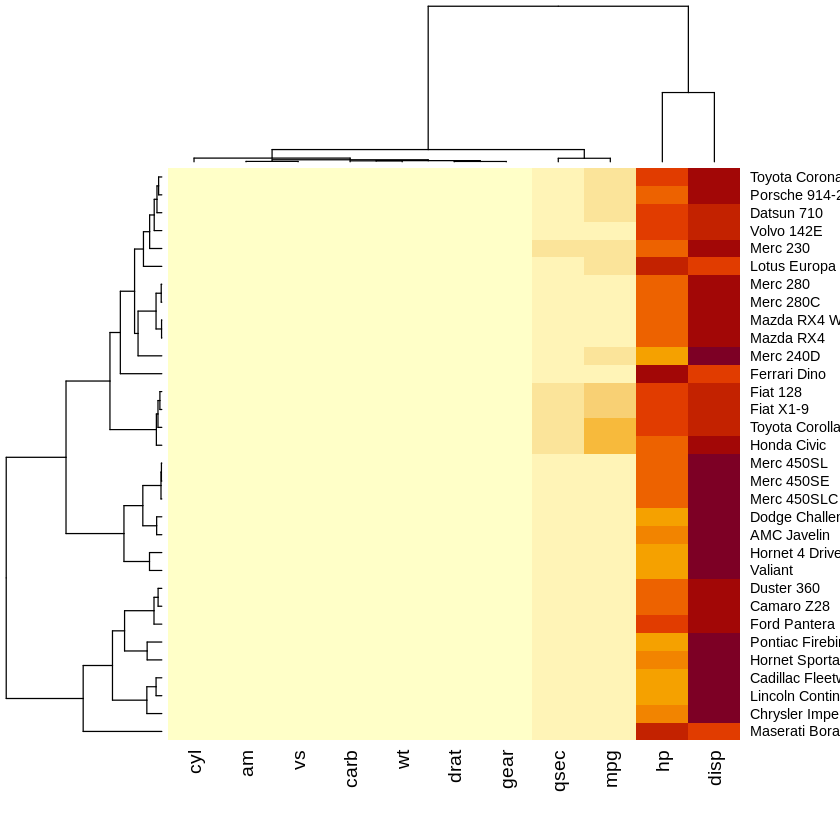

In [ ]:
par(mar=rep(0.2,4),mfrow=c(1,1))
heatmap(mtcars.mxs)

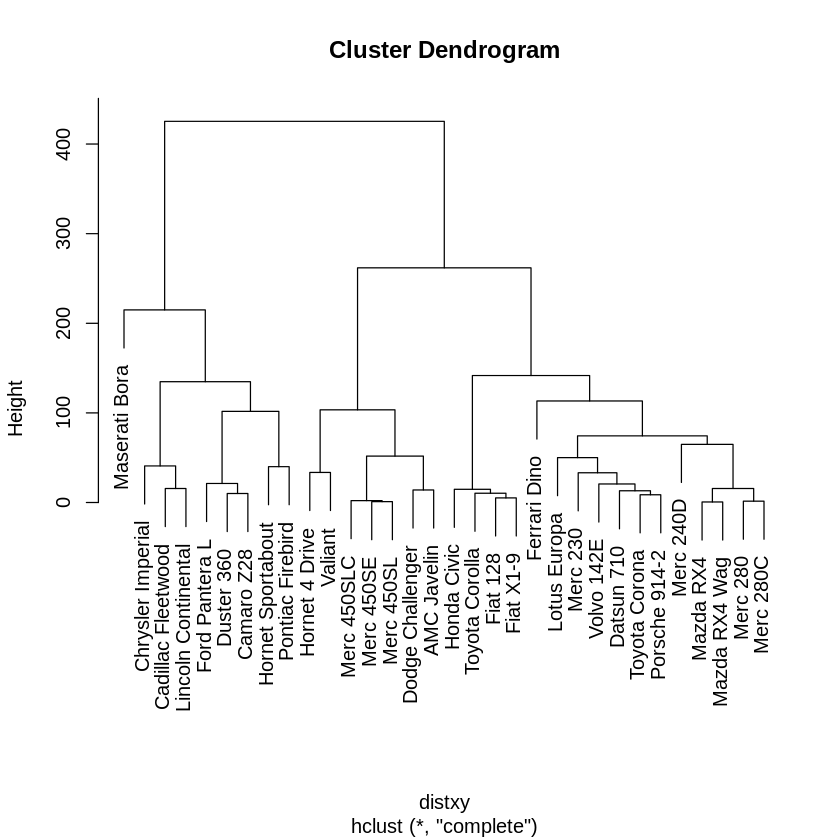

In [ ]:
distxy <- dist(mtcars.mxs)
hClustering <- hclust(distxy)
plot(hClustering)

ERROR: ignored

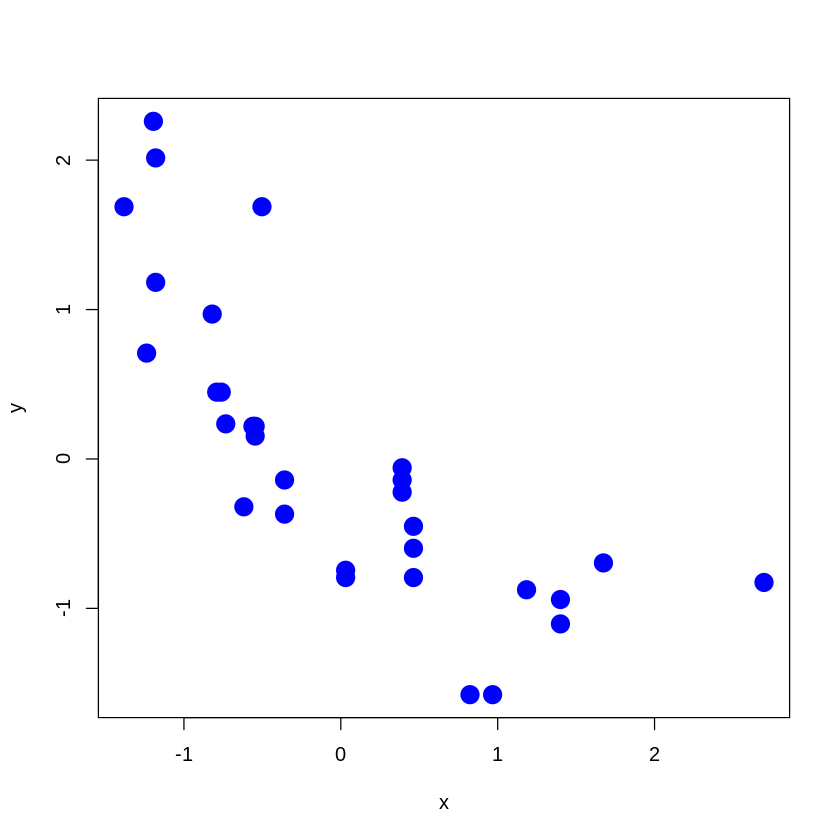

In [ ]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [ ]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [ ]:
kmeansObj$cluster

[1] 1 1 1 1 1 2 3 1 1 1 1 1 1 2 2 2 3 3 3 1 1 1 2 1 3 3 3 2 1 2 1

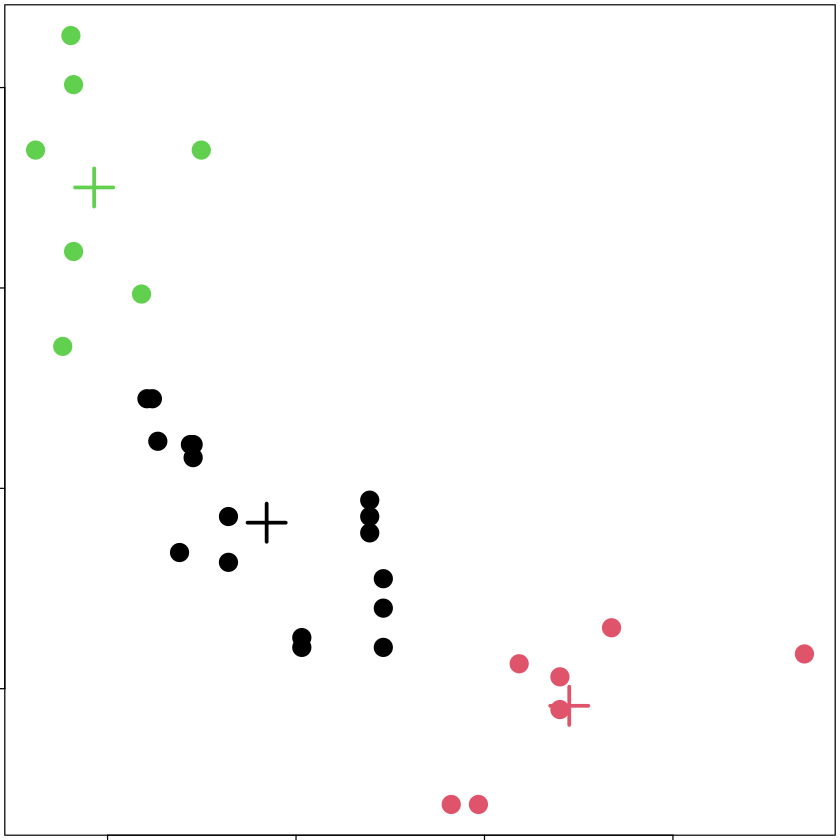

In [ ]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

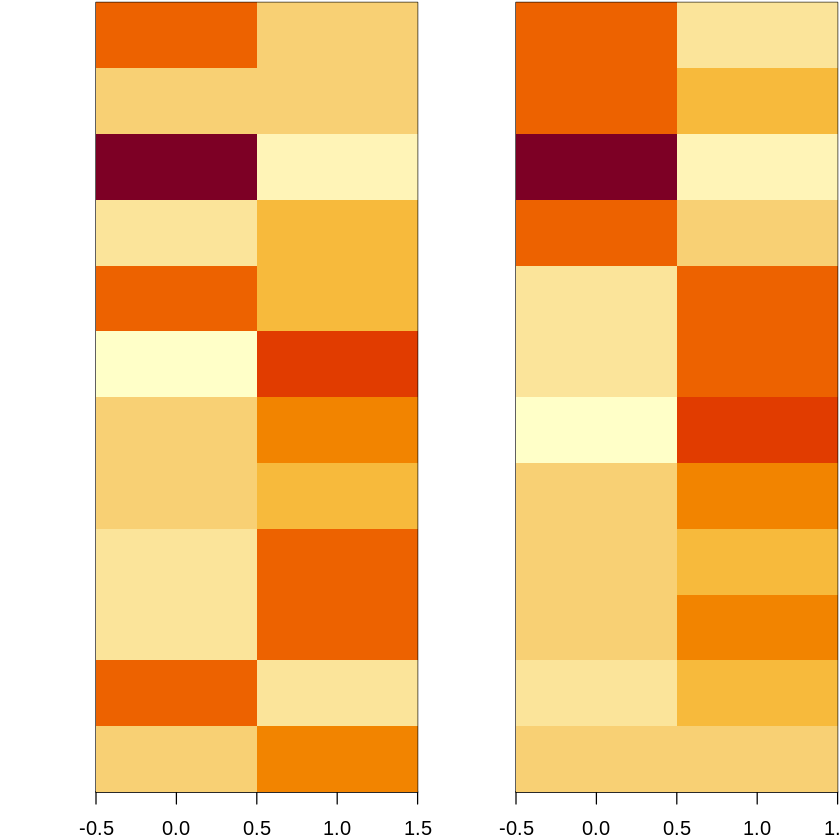

In [ ]:
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
kmeansObj <- kmeans(dataMatrix,centers=3)
par(mfrow=c(1,2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[,nrow(dataMatrix):1],yaxt="n")
image(t(dataMatrix)[,order(kmeansObj$cluster)],yaxt="n")

In [ ]:
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

[1]  169 9835

In [ ]:
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [ ]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5]) # Show the top 5 rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [ ]:
if (!require('arulesViz')){
install.packages("arulesViz");
library(arulesViz)
}
#Mac->http://planspace.org/2013/01/17/fix-r-tcltk-dependency-problem-on-mac/
plot(rules,method="graph",interactive=TRUE,shading=NA) #會跑一陣子

Warning message in plot.rules(rules, method = "graph", interactive = TRUE, shading = NA):
“The parameter interactive is deprecated. Use engine='interactive' instead.”
Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


ERROR: ignored

In [ ]:
install.packages('prophet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘rstan’


Warning message in install.packages("prophet"):
“installation of package ‘V8’ had non-zero exit status”
Warning message in install.packages("prophet"):
“installation of package ‘rstan’ had non-zero exit status”
Warning message in install.packages("prophet"):
“installation of package ‘prophet’ had non-zero exit status”


In [ ]:
library(prophet)
library(dplyr)
df <- read.csv('https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv')
mutate(y = log(y))
m <- prophet(df)
future <- make_future_dataframe(m, periods = 365)
tail(future)
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])
plot(m, forecast)
prophet_plot_components(m, forecast)

ERROR: ignored

In [ ]:
devtools::install_github("rstudio/tensorflow")

Skipping install of 'tensorflow' from a github remote, the SHA1 (ef1e9704) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
library(tensorflow)
sess = tf$Session()
hello <- tf$constant('Hello, TensorFlow!')
sess$run(hello)

ERROR: ignored

In [ ]:
install.packages("drat", repos="https://cran.rstudio.com")
drat:::addRepo("dmlc")
install.packages("mxnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘mxnet’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [ ]:
sample(1:10,3)

[1] 10  3  9

In [ ]:
sample(1:nrow(NBA1819),nrow(NBA1819)/3)

[1] 136 338 394 192 247  73  11 239 370 447 516 521 257 357 167  16 301 164
 [19] 143 288 151  44 129 420 114 195 492 233 102 224 131 337  75 296  41  62
 [37] 437 149 222 507 522 345 286  17 371  51  25 242 240 157 425 509 265  88
 [55] 134 402 483 225 325 500 344 203 417 528 230 419 504 259 510 193 468 409
 [73] 175  38 347 518 207 364 529 281  28 299   5  70 494 214 291 182 458 376
 [91] 484 413 526 229 205 237 118   3 144 132 232 200 303 355 486 244  80 186
[109] 238 443 304  84  46 145 108 524 135  32 448 199 496 326 442 196 159 123
[127] 272 465 165   9  67  89 300  92 106  30 110 150 246 360  83 513 201 274
[145] 369  82  15 430  13 249  43  59 414 271 153 439  63 381 403 336  97 245
[163] 462 208  49 220  93 400  95 313 263 235 511 227 449 277

In [ ]:
NBA1819$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1819[sample(1:nrow(NBA1819),nrow(NBA1819)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1819$Test==F),sum(NBA1819$Test==T))

[1] 353 176

In [ ]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1819[NBA1819$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.972,6.6214,1.4,1.8e-01
TotalMinutesPlayed,0.023,0.0071,3.2,1.6e-03
FieldGoalsAttempted,0.957,0.0258,37.1,3.2e-122
PositionPF,-10.039,7.5802,-1.3,1.9e-01
PositionPG,-40.797,7.6293,-5.3,1.6e-07
PositionSF,-23.119,7.9277,-2.9,3.8e-03
PositionSG,-27.662,7.9926,-3.5,6.1e-04
ThreesAttempted,0.087,0.0272,3.2,1.5e-03
FreeThrowsAttempted,0.892,0.0428,20.9,4.7e-63


In [ ]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.972,6.6214,1.4,1.8e-01
TotalMinutesPlayed,0.023,0.0071,3.2,1.6e-03
FieldGoalsAttempted,0.957,0.0258,37.1,3.2e-122
PositionPF,-10.039,7.5802,-1.3,1.9e-01
PositionPG,-40.797,7.6293,-5.3,1.6e-07
PositionSF,-23.119,7.9277,-2.9,3.8e-03
PositionSG,-27.662,7.9926,-3.5,6.1e-04
ThreesAttempted,0.087,0.0272,3.2,1.5e-03
FreeThrowsAttempted,0.892,0.0428,20.9,4.7e-63


In [ ]:
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.972,6.6214,1.4,1.8e-01
TotalMinutesPlayed,0.023,0.0071,3.2,1.6e-03
FieldGoalsAttempted,0.957,0.0258,37.1,3.2e-122
PositionPF,-10.039,7.5802,-1.3,1.9e-01
PositionPG,-40.797,7.6293,-5.3,1.6e-07
PositionSF,-23.119,7.9277,-2.9,3.8e-03
PositionSG,-27.662,7.9926,-3.5,6.1e-04
ThreesAttempted,0.087,0.0272,3.2,1.5e-03
FreeThrowsAttempted,0.892,0.0428,20.9,4.7e-63


In [ ]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.972,6.6214,1.4,1.8e-01
TotalMinutesPlayed,0.023,0.0071,3.2,1.6e-03
FieldGoalsAttempted,0.957,0.0258,37.1,3.2e-122
PositionPF,-10.039,7.5802,-1.3,1.9e-01
PositionPG,-40.797,7.6293,-5.3,1.6e-07
PositionSF,-23.119,7.9277,-2.9,3.8e-03
PositionSG,-27.662,7.9926,-3.5,6.1e-04
ThreesAttempted,0.087,0.0272,3.2,1.5e-03
FreeThrowsAttempted,0.892,0.0428,20.9,4.7e-63


[1] 1

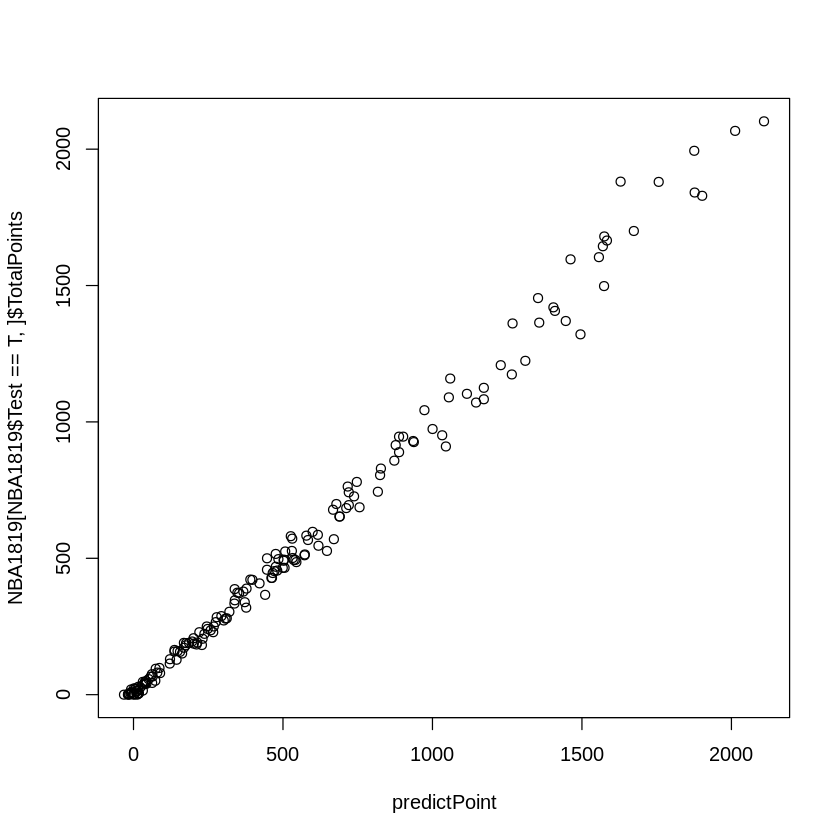

In [ ]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1819[NBA1819$Test==T,])

cor(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints) #相關係數

plot(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)

In [ ]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")
mydata$admit <- factor(mydata$admit) # 類別變項要轉為factor
mydata$rank <- factor(mydata$rank) # 類別變項要轉為factor
mydata$Test<-F #新增一個參數紀錄分組
mydata[sample(1:nrow(mydata),nrow(mydata)/3),"Test"]<-T #隨機取1/3當Test set
c(sum(mydata$Test==F),sum(mydata$Test==T)) # Training set : Test set學生數

#修改一下factor的level: 改成Level 2為錄取,1為不錄取-->Level 2 要放正面答案
mydata$admit<-factor(mydata$admit,levels=c(0,1))

[1] 267 133

In [ ]:
# GRE:某考試成績, GPA:在校平均成績, rank:學校聲望
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata[mydata$Test==F,], family = "binomial")
finalFit<-stepAIC(mylogit,direction = "both",trace=FALSE) # 雙向逐步選擇模型
summary(finalFit)


Call:
glm(formula = admit ~ gpa + rank, family = "binomial", data = mydata[mydata$Test == 
    F, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.595  -0.919  -0.695   1.146   2.086  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.373      1.332   -2.53  0.01131 *  
gpa            1.079      0.376    2.87  0.00409 ** 
rank2         -0.775      0.383   -2.02  0.04329 *  
rank3         -1.541      0.418   -3.69  0.00022 ***
rank4         -1.448      0.504   -2.87  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 345.18  on 266  degrees of freedom
Residual deviance: 319.78  on 262  degrees of freedom
AIC: 329.8

Number of Fisher Scoring iterations: 4


In [ ]:
AdmitProb<-predict(finalFit, # 用Training set做的模型

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率

head(AdmitProb)

3    6    7    9   10   11 
0.72 0.29 0.46 0.22 0.52 0.38

In [ ]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit) # row,column

       
         0  1
  FALSE 85 24
  TRUE  14 10

In [ ]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit) # row,column

       
         0  1
  FALSE 85 24
  TRUE  14 10

In [ ]:
AdmitProb<-predict(finalFit,

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率
AdmitAns<-factor(ifelse(AdmitProb>0.5,1,0),levels=c(0,1))
str(AdmitAns)

 Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 1 2 1 ...
 - attr(*, "names")= chr [1:133] "3" "6" "7" "9" ...


In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘gower’, ‘ipred’, ‘timeDate’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [ ]:
library(caret)
specificity(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:tensorflow’:

    train




[1] 0.86

In [ ]:
specificity(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

[1] 0.86

In [ ]:
posPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")

[1] 0.42

In [ ]:
negPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

[1] 0.78

In [ ]:
if (!require('rpart')){
install.packages("rpart"); library(rpart)
}
DT<-rpart(Position~Blocks+TotalRebounds+ThreesMade+Assists+Steals,
data=NBA1819[NBA1819$Test==F,])

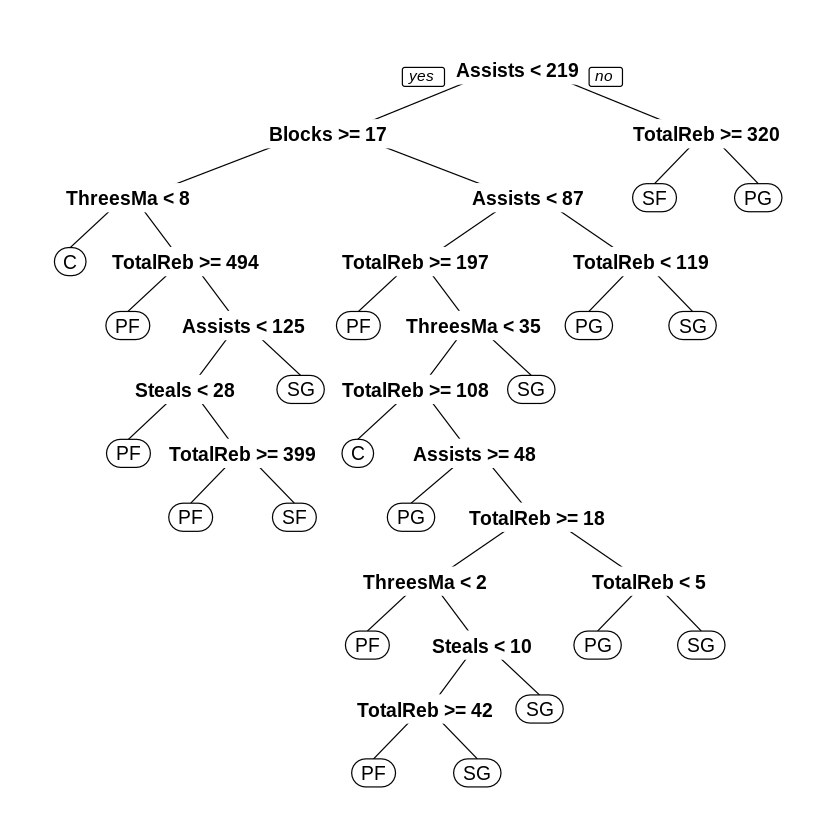

In [ ]:
if (!require('rpart.plot')){
install.packages("rpart.plot");
library(rpart.plot)
}
prp(DT)

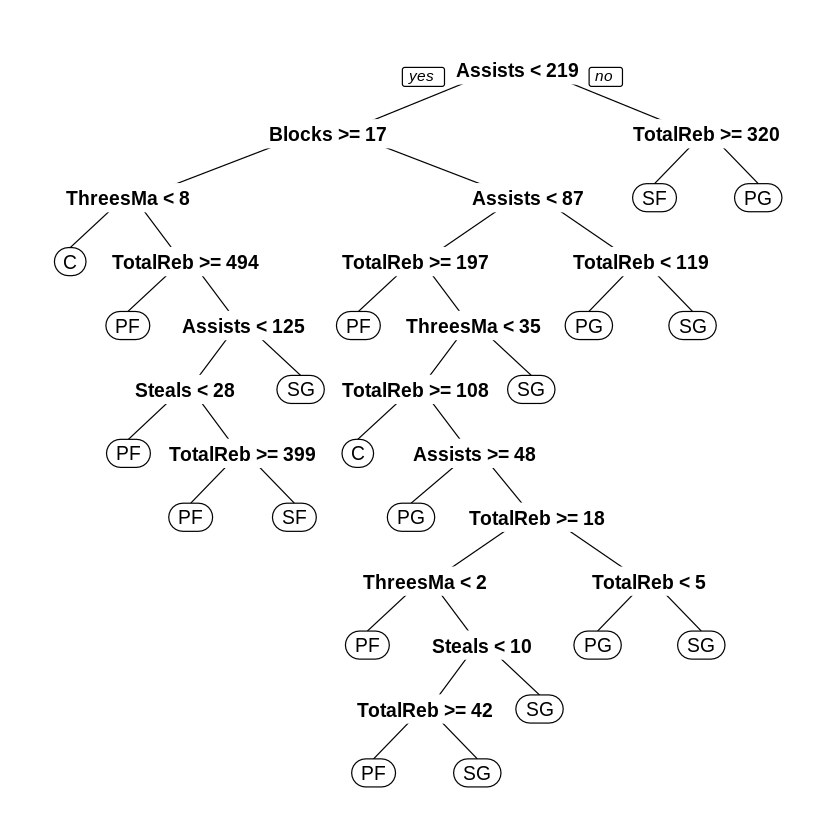

In [ ]:
prp(DT)

In [ ]:
posPred<-predict(DT,newdata= NBA1819[NBA1819$Test==T,]) #Test==T, test data
# 預設為class probabilities, type = "prob"
head(posPred)

,C,PF,PG,SF,SG
7,0.11,0.11,0.47,0.16,0.16
9,0.00,0.15,0.00,0.38,0.46
12,0.00,0.00,1.00,0.00,0.00
15,0.00,0.15,0.10,0.25,0.50
17,0.11,0.11,0.47,0.16,0.16
18,0.14,0.18,0.18,0.32,0.18


In [ ]:
result<-cbind(round(posPred,digits = 2),
NBA1819[NBA1819$Test==T,]$Name,

as.character(NBA1819[NBA1819$Test==T,]$Position))
head(result)

,C,PF,PG,SF,SG,,
7,0.11,0.11,0.47,0.16,0.16,De Akoon-purcell,SG
9,0,0.15,0,0.38,0.46,Rawle Alkins,SG
12,0,0,1,0,0,Kadeem Allen,SG
15,0,0.15,0.1,0.25,0.5,Kyle Anderson,SF
17,0.11,0.11,0.47,0.16,0.16,Ike Anigbogu,C
18,0.14,0.18,0.18,0.32,0.18,Gi Antetokounmpo,PF


In [ ]:
posPredC<-predict(DT,newdata= NBA1819[NBA1819$Test==T,],type = "class")
# type = "class" 直接預測類別
head(posPredC)

7  9 12 15 17 18 
PG SG PG SG PG SF 
Levels: C PF PG SF SG

In [ ]:
resultC<-cbind(as.character(posPredC),NBA1819[NBA1819$Test==T,]$Name,
as.character(NBA1819[NBA1819$Test==T,]$Position))
head(resultC)

PG,De Akoon-purcell,SG
SG,Rawle Alkins,SG
PG,Kadeem Allen,SG
SG,Kyle Anderson,SF
PG,Ike Anigbogu,C
SF,Gi Antetokounmpo,PF


In [ ]:
install.packages("mlbench")
library(mlbench)
data(Sonar)
str(Sonar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	208 obs. of  61 variables:
 $ V1   : num  0.02 0.0453 0.0262 0.01 0.0762 0.0286 0.0317 0.0519 0.0223 0.0164 ...
 $ V2   : num  0.0371 0.0523 0.0582 0.0171 0.0666 0.0453 0.0956 0.0548 0.0375 0.0173 ...
 $ V3   : num  0.0428 0.0843 0.1099 0.0623 0.0481 ...
 $ V4   : num  0.0207 0.0689 0.1083 0.0205 0.0394 ...
 $ V5   : num  0.0954 0.1183 0.0974 0.0205 0.059 ...
 $ V6   : num  0.0986 0.2583 0.228 0.0368 0.0649 ...
 $ V7   : num  0.154 0.216 0.243 0.11 0.121 ...
 $ V8   : num  0.16 0.348 0.377 0.128 0.247 ...
 $ V9   : num  0.3109 0.3337 0.5598 0.0598 0.3564 ...
 $ V10  : num  0.211 0.287 0.619 0.126 0.446 ...
 $ V11  : num  0.1609 0.4918 0.6333 0.0881 0.4152 ...
 $ V12  : num  0.158 0.655 0.706 0.199 0.395 ...
 $ V13  : num  0.2238 0.6919 0.5544 0.0184 0.4256 ...
 $ V14  : num  0.0645 0.7797 0.532 0.2261 0.4135 ...
 $ V15  : num  0.066 0.746 0.648 0.173 0.453 ...
 $ V16  : num  0.227 0.944 0.693 0.213 0.533 ...
 $ V17  : num  0.31 1 0.6759 0.0693 0.7306 ...
 $ V18  : num  0.

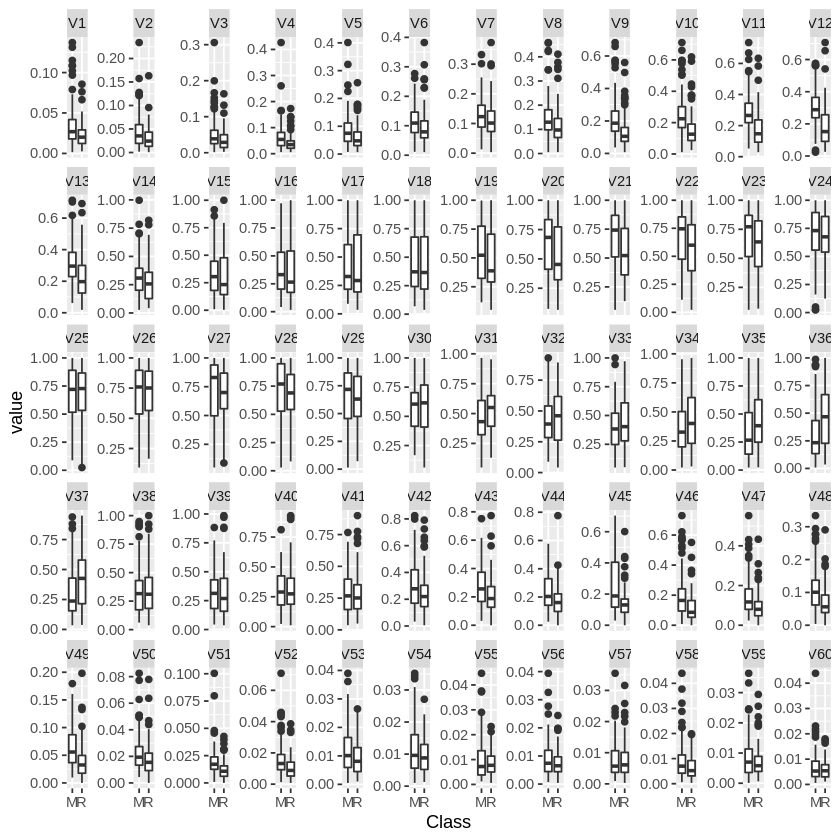

In [ ]:
library(ggplot2);library(reshape2) #install.packages(c("ggplot2","reshape2"))
Sonar.m<-melt(Sonar,id.vars = c("Class"))
ggplot(Sonar.m)+geom_boxplot(aes(x=Class,y=value))+
facet_wrap(~variable, nrow=5,scales = "free_y") #圖片太小了

In [ ]:
Sonar$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
Sonar[sample(1:nrow(Sonar),nrow(Sonar)/3),"Test"]<-T
# 看一下 Training set : Test set 案例數
c(sum(Sonar$Test==F),sum(Sonar$Test==T))

[1] 139  69

In [ ]:
fit<-glm(Class~., Sonar[Sonar$Test==F,],family="binomial")
finalFit<-stepAIC(fit,direction = "both",trace = F)
summary(finalFit)$coefficients

串流輸出內容已截斷至最後 5000 行。
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),13957,727168,0.0192,0.98
V3,44212,2239023,0.0197,0.98
V4,-67018,3649302,-0.0184,0.99
V5,20519,852250,0.0241,0.98
V6,-45850,1528748,-0.0300,0.98
V7,42346,1460904,0.0290,0.98
V9,-17555,869497,-0.0202,0.98
V13,-7512,291661,-0.0258,0.98
V17,20537,1342074,0.0153,0.99
V18,-20349,1500522,-0.0136,0.99


In [ ]:
MinePred<-predict(finalFit,newdata = Sonar[Sonar$Test==T,])
MineAns<-ifelse(MinePred>0.5,"R","M") #>0.5: Level 2
MineAns<-factor(MineAns,levels = c("M","R"))
MineAns

3   6  11  21  27  29  33  38  41  49  51  54  59  62  63  64  66  67  70  72 
  M   R   R   M   M   R   R   R   M   M   R   R   R   R   R   R   R   R   R   R 
 73  77  79  83  87  89  94  95  96 101 105 115 119 123 124 125 127 130 131 132 
  R   R   R   M   R   R   M   M   R   R   R   M   M   M   M   M   R   M   M   R 
133 137 138 140 141 143 146 148 151 157 161 163 168 171 172 174 175 176 184 185 
  M   M   M   R   M   M   M   M   R   M   M   M   R   M   M   M   M   M   M   M 
186 188 193 196 199 200 202 205 206 
  M   M   M   M   M   M   M   M   R 
Levels: M R

In [ ]:
library(caret) # install.packages("caret") #計算參數的packages
sensitivity(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.8

In [ ]:
specificity(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.72

In [ ]:
posPredValue(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.8

In [ ]:
negPredValue(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.72